# Data Exploration

In [30]:
import pandas as pd

def load_csv(csv_file):
    return pd.read_csv(csv_file)

job_data = load_csv("seek_australia.csv")

In [6]:
job_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [32]:
city_job_dict = dict()

for each, every in zip(job_data['city'], job_data['category']):
    if each not in city_job_dict:
        city_job_dict[each] = dict()
    if every not in city_job_dict[each]:
        city_job_dict[each][every] = 1
    else:
        city_job_dict[each][every] += 1

#city_job_dict

## Visualise the frequency of job categories

In [33]:
import matplotlib.pyplot as plt

#define subplots
#print(len(city_job_dict))

col = 3
row = len(city_job_dict) // col
#print(row)
if len(city_job_dict) % col != 0:
    row += 1
#print(row)
fig, ax = plt.subplots(row, col, figsize=(50,50))
fig.tight_layout()

city_name_list = list(city_job_dict.keys())
#print(city_name_list)

row_count = 0
col_count = 0
plt.subplots_adjust(bottom=80, right=1, top=85)
for each in range(row):
    for every in range(col):
        if each * col + every < len(city_job_dict):
            job_data_each_city = city_job_dict[city_name_list[each*col+every]]
            names = list(job_data_each_city.keys())
            values = list(job_data_each_city.values())            
            ax[each, every].bar(names, values)
            ax[each, every].set_xticklabels(names, rotation=60)
            ax[each, every].title.set_text(city_name_list[each*col+every])
plt.show()


/var/folders/1b/c_8cjgbj6lx42lnk62sdcg840000gn/T/ipykernel_46710/2464324461.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[each, every].set_xticklabels(names, rotation=60)
/var/folders/1b/c_8cjgbj6lx42lnk62sdcg840000gn/T/ipykernel_46710/2464324461.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[each, every].set_xticklabels(names, rotation=60)
/var/folders/1b/c_8cjgbj6lx42lnk62sdcg840000gn/T/ipykernel_46710/2464324461.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[each, every].set_xticklabels(names, rotation=60)
/var/folders/1b/c_8cjgbj6lx42lnk62sdcg840000gn/T/ipykernel_46710/2464324461.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[each, every].set_xticklabels(names, rotation=60)
/var/folders/1b/c_8cjgbj6lx42lnk62sdcg840000gn/T/ipykernel_46710/2464324461.py:28: UserWarning: FixedFormatter should only be used together with FixedLo

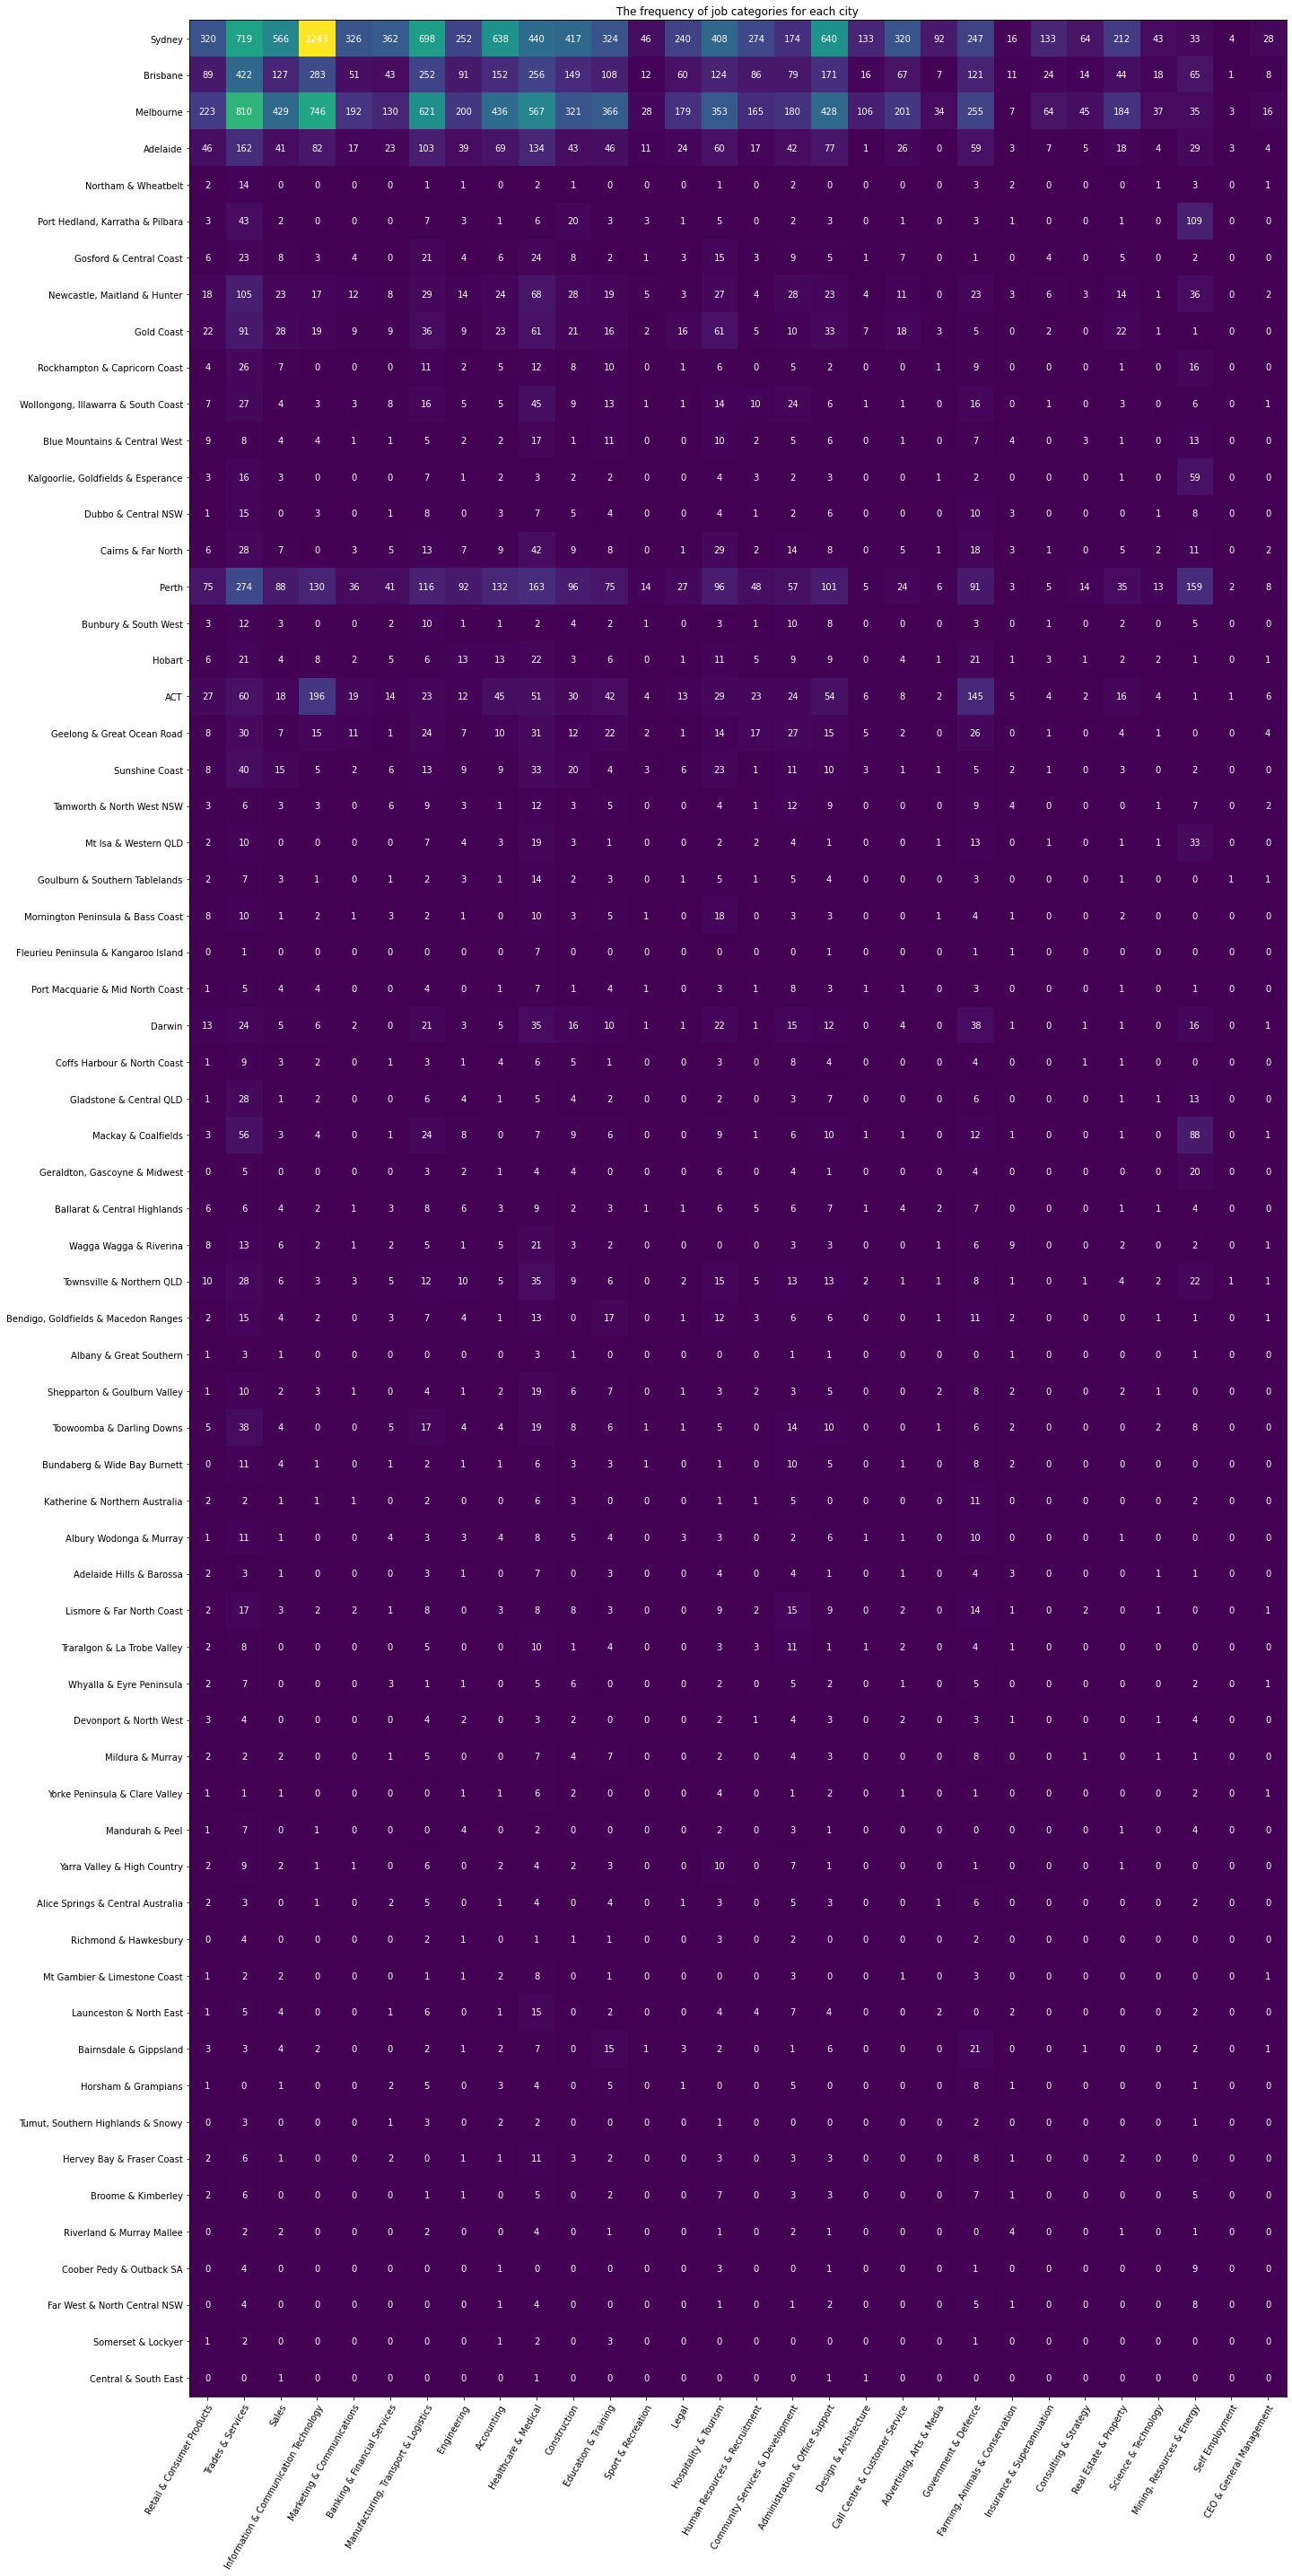

In [41]:
# A new plot using heat map

import matplotlib.pyplot as plt
import numpy as np

#print(city_job_dict)

plot_row = list(city_job_dict.keys())
#print(plot_row)

plot_column = []

for each in plot_row:
    for every in city_job_dict[each]:
        if every not in plot_column:
            plot_column.append(every)
            
#print(plot_column)

count_category = []
for each in plot_row:
    row_list = []
    for every in plot_column:
        try:
            row_list.append(city_job_dict[each][every])
        except:
            row_list.append(0)
    count_category.append(row_list)
    
#print(count_category)

count_category = np.array(count_category)

fig, ax = plt.subplots(figsize=(50, 40))
im = ax.imshow(count_category)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(plot_column)), labels=plot_column)
ax.set_yticks(np.arange(len(plot_row)), labels=plot_row)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(plot_row)):
    for j in range(len(plot_column)):
        text = ax.text(j, i, count_category[i, j],
                       ha="center", va="center", color="w")

ax.set_title("The frequency of job categories for each city")
fig.tight_layout()
plt.savefig("output.jpg")
plt.show()

In [17]:
city_job_dict

{'Sydney': {'Retail & Consumer Products': 320,
  'Trades & Services': 719,
  'Sales': 566,
  'Information & Communication Technology': 1243,
  'Marketing & Communications': 326,
  'Banking & Financial Services': 362,
  'Manufacturing, Transport & Logistics': 698,
  'Engineering': 252,
  'Accounting': 638,
  'Healthcare & Medical': 440,
  'Construction': 417,
  'Education & Training': 324,
  'Sport & Recreation': 46,
  'Legal': 240,
  'Hospitality & Tourism': 408,
  'Human Resources & Recruitment': 274,
  'Community Services & Development': 174,
  'Administration & Office Support': 640,
  'Design & Architecture': 133,
  'Call Centre & Customer Service': 320,
  'Advertising, Arts & Media': 92,
  'Government & Defence': 247,
  'Farming, Animals & Conservation': 16,
  'Insurance & Superannuation': 133,
  'Consulting & Strategy': 64,
  'Real Estate & Property': 212,
  'Science & Technology': 43,
  'Mining, Resources & Energy': 33,
  'Self Employment': 4,
  'CEO & General Management': 28},
 

## Visualise the Word Frequency

In [9]:
job_list = []

for each in list(city_job_dict.keys()):
    for key, number in zip(city_job_dict[each].keys(), city_job_dict[each].values()):
        job_list.extend([key] * number)

word_dict = dict()

for each in range(len(job_list)):
    job_list[each] = job_list[each].replace('&', '').replace(',', '')
    list_split = job_list[each].split(' ')
    for every in list_split:
        if every != '':
            if every not in word_dict:
                word_dict[every] = 1
            else:
                word_dict[every] += 1
        
#job_list
#word_dict

[Text(0, 0, '4986'),
 Text(0, 0, '3346'),
 Text(0, 0, '2944'),
 Text(0, 0, '2802'),
 Text(0, 0, '2802'),
 Text(0, 0, '2371'),
 Text(0, 0, '2371'),
 Text(0, 0, '2220'),
 Text(0, 0, '2220'),
 Text(0, 0, '2220'),
 Text(0, 0, '1766'),
 Text(0, 0, '1766'),
 Text(0, 0, '1766'),
 Text(0, 0, '1648'),
 Text(0, 0, '1557'),
 Text(0, 0, '1483'),
 Text(0, 0, '1483'),
 Text(0, 0, '1464'),
 Text(0, 0, '1346'),
 Text(0, 0, '1346'),
 Text(0, 0, '1326'),
 Text(0, 0, '1224'),
 Text(0, 0, '1224'),
 Text(0, 0, '986'),
 Text(0, 0, '986'),
 Text(0, 0, '986'),
 Text(0, 0, '933'),
 Text(0, 0, '933'),
 Text(0, 0, '857'),
 Text(0, 0, '857'),
 Text(0, 0, '837'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '707'),
 Text(0, 0, '707'),
 Text(0, 0, '701'),
 Text(0, 0, '701'),
 Text(0, 0, '700'),
 Text(0, 0, '700'),
 Text(0, 0, '597'),
 Text(0, 0, '597'),
 Text(0, 0, '597'),
 Text(0, 0, '593'),
 Text(0, 0, '296'),
 Text(0, 0, '296'),
 Text(0, 0, '258'),
 Text(0, 0, '258'

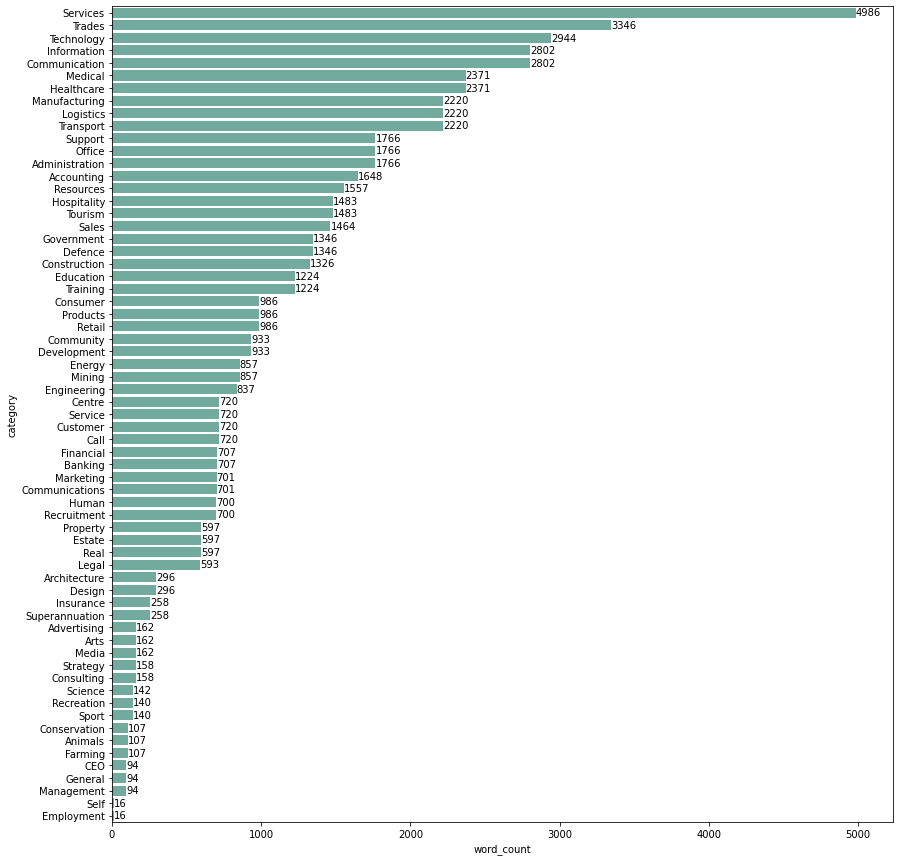

In [10]:
import seaborn as sns

df = pd.DataFrame({
    'category': word_dict.keys(),
    'word_count': word_dict.values()
})

#df

# Set the figure size
plt.figure(figsize=(14, 15))

# Reorder this data frame
df = df.sort_values(['word_count'], ascending=False).reset_index(drop=True)

# Make a barplot
plot = sns.barplot(
    x="word_count", 
    y="category", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

plot.bar_label(plot.containers[0])



In [3]:
import nltk
nltk.download('punkt') # Sentence Tokenize
nltk.download('averaged_perceptron_tagger') # POS Tagging
nltk.download('maxent_ne_chunker') # Named Entity Chunking
nltk.download('words') # Word Tokenize

# texts is a collection of documents.
# Here is a single document with two sentences.

desciption_token_list = []
len_desciption_token_list = 0
for each in job_data['job_description']:
      for text in [each]:
            try:
                  sentences = nltk.sent_tokenize(text)
                  for sentence in sentences:
                        words = nltk.word_tokenize(sentence)
                        desciption_token_list.append(words)
                        len_desciption_token_list += len(words)
                        #print(desciption_token_list)
                        #exit()
            except:
                  continue


print("The vocabulary number after tokenize is: {}.".format(len_desciption_token_list))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package words is already up-to-date!


The vocabulary number after tokenize is: 9804607.


In [4]:
desciption_token_list[0:10]

[['Have',
  'you',
  'had',
  '10',
  'years',
  'experience',
  'in',
  'fresh',
  'produce',
  'that',
  'wants',
  'to',
  'manage',
  'their',
  'own',
  'store',
  'for',
  'a',
  'family',
  'owned',
  'Australian',
  'company',
  'that',
  'is',
  'passionate',
  'about',
  'food',
  '.'],
 ['We',
  'are',
  'looking',
  'for',
  ':',
  'Must',
  'have',
  '10+',
  'years',
  'in',
  'the',
  'fresh',
  'food',
  'business',
  'and',
  'have',
  'the',
  'passion',
  'for',
  'the',
  'role',
  '.'],
 ['Current',
  '2IC',
  'looking',
  'to',
  'progress',
  'with',
  'training',
  'into',
  'Store',
  'manager',
  'role',
  '.'],
 ['Excellent',
  'customer',
  'service',
  'and',
  'communication',
  'skills',
  'Be',
  'hands',
  'on',
  'and',
  'have',
  'a',
  'can',
  'do',
  'attitude',
  'Be',
  'into',
  'the',
  'fresh',
  'food',
  'business',
  'and',
  'have',
  'the',
  'passion',
  'for',
  'the',
  'role',
  'Hardworking',
  ',',
  'ambitious',
  'and',
  'compet